In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def print_mat(MAT, Format = '%.0f '):
    for r in MAT:
        Line = ''
        for c in r:     
            Line += (Format%(c))  
        print(Line)

In [25]:
def Draw_mat(M):
    global P
    plt.figure(figsize = [7,7])
    
    for i in np.arange(0.5,P-1,1.0):
        plt.axhline(y=i, xmin=-0.5, xmax=P-0.5, linewidth=2, color=(0.5,0.5,0.5))
        plt.axvline(x=i, ymin=-0.5, ymax=P-0.5, linewidth=2, color=(0.5,0.5,0.5))
    plt.imshow(1-M, cmap = plt.cm.gray_r, interpolation = 'nearest')
    
    plt.xticks(range(0,M.shape[1],4))
    plt.yticks(range(0,M.shape[0],4))
    
    plt.show()
                

In [4]:
P = 32
Init_Data = np.zeros((P,1), dtype = 'float32')

In [5]:
# Allocate Initial Data
Init_Data[0][0] = 1.0

In [6]:
print_mat(np.transpose(Init_Data))

1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 


In [7]:
# Adjacency Matrix
def Get_ADJ(file_path):
    F = pd.read_csv(file_path, delimiter = ' ', header = None)
    return (F.values).astype('float32')

In [8]:
Adj = Get_ADJ('topology/32k4.adj')

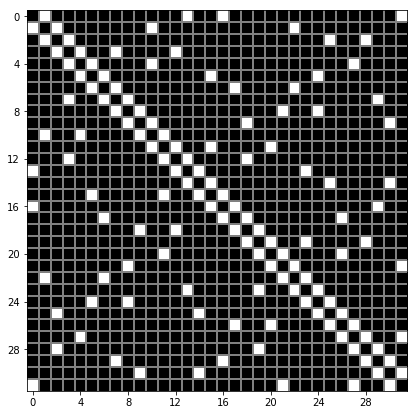

In [26]:
Draw_mat(Adj)

In [10]:
I_P = np.identity(P)

In [11]:
O_PP = np.ones([P,P],dtype = 'float32')
O_1P = np.ones([1,P],dtype = 'float32')

In [59]:
def smoothstep(x):
    R,C = x.shape
    for r in range(R):
        for c in range(C):
            if x[c][r] > 1:
                x[c][r] = 1

In [55]:
def Iter_Comm(A_now, D_now):
    global O_PP, O_1P
    D_next = np.matmul(I_P+Adj,D_now)
    smoothstep(D_next)
    #D_next = ((np.matmul(I_P+Adj,D_now))>=1).astype('float32')
    #A_next = A_now * (O_PP - np.matmul(D_next, O_1P))
    return A_now, D_next
    

In [56]:
from copy import copy

# Simulation

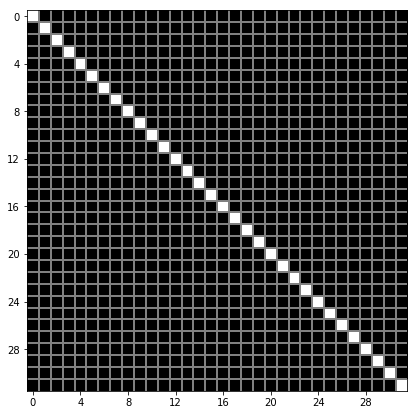

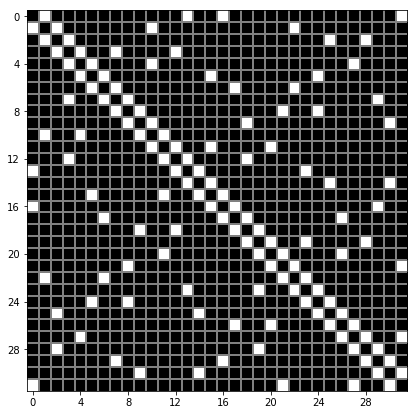

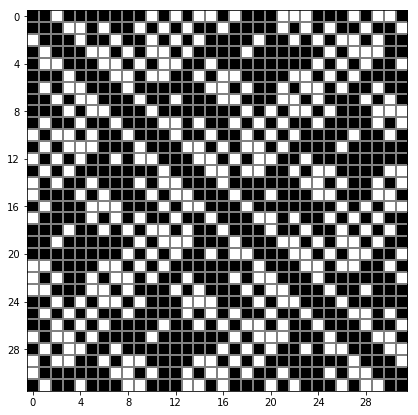

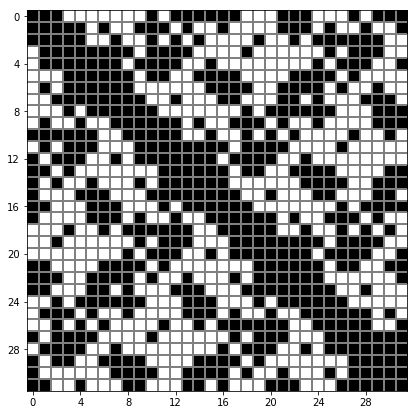

In [75]:
A = copy(Adj)
#D = copy(Init_Data)
D = np.identity(P)

step = 0
Draw_mat(np.transpose(D))
while (np.min(D) == 0):
    A,D_N = Iter_Comm(A,D)
    Draw_mat(np.transpose(D_N - D))
    D = D_N
    step += 1

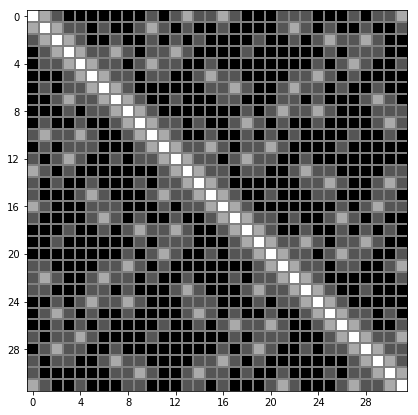

In [69]:
A = copy(Adj)
#D = copy(Init_Data)
D = np.identity(P)
step = 0
Distance_Mat = np.zeros([P,P])
while (np.min(D) == 0):
    A,D_N = Iter_Comm(A,D)
    
    step += 1
    Distance_Mat += (step*(D_N - D))
    D = D_N
    
Draw_mat(np.max(Distance_Mat) - Distance_Mat)

# A & D

In [72]:
def Avg_Dist(Dist_M):
    global P
    return np.sum(Dist_M)/(P*(P-1))

def Diameter(Dist_M):
    return np.max(Dist_M)

In [73]:
Avg_Dist(Distance_Mat)

2.3548387096774195

In [74]:
Diameter(Distance_Mat)

3.0

# Circuits (Rings)

In [ ]:
# Communicating Steps

A = copy(Adj)
D = np.identity(P)

step = 0
Draw_mat(np.transpose(D))

Diagrams = []

while (np.min(D) == 0):
    A,D_N = Iter_Comm(A,D)
    Diagrams.append(np.transpose(D_N - D))
    D = D_N
    step += 1